<a href="https://colab.research.google.com/github/kdmwangi/CODSOFT/blob/main/Indian_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Read Dataset

In [2]:
dataset = pd.read_csv('IMDb Movies India.csv', encoding='cp1006')

# Data Exploration

In [3]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
dataset.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
dataset.shape

(15509, 10)

In [8]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
dataset.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Data Cleaning

In [10]:
# check for NaN values
dataset.isna().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

In [11]:
dataset = dataset.dropna().reset_index(drop=True)
print(dataset.shape)

(5659, 10)


In [12]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
# remove the min string in duration column
def remove_min(duration):
  return duration.replace('min', '')
dataset['Duration'] = dataset['Duration'].apply(remove_min)

# remove the special characters in Name
dataset['Name'] = dataset['Name'].str.replace(r'[^A-Za-z\s]+','')

# there are movies which have duplicate names but from different years
dataset[dataset['Name'].duplicated(keep=False)][-10:]

<ipython-input-13-21fb19ecaa0a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace(r'[^A-Za-z\s]+','')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5616,Zanjeer,(1973),145,"Action, Crime, Drama",7.6,"3,729",Prakash Mehra,Amitabh Bachchan,Jaya Bachchan,Pran
5617,Zanjeer,(2013),137,"Action, Crime, Drama",3.2,"2,416",Apoorva Lakhia,Ram Charan,Priyanka Chopra Jonas,Sanjay Dutt
5626,Zid,(1994),129,"Drama, Romance",4.7,18,Esmayeel Shroff,Jay Mehta,Raageshwari,Mala Sinha
5627,Zid,(2014),126,"Crime, Romance, Thriller",4.4,"1,105",Vivek Agnihotri,Mannara Chopra,Karanvir Sharma,Shraddha Das
5628,Ziddi,(1964),150,"Musical, Romance",6.9,44,Pramod Chakravorty,Joy Mukherjee,Asha Parekh,Mehmood
5629,Ziddi,(1997),170,"Action, Drama",5.8,"1,551",Guddu Dhanoa,Sunny Deol,Raveena Tandon,Anupam Kher
5637,Zindagi,(1964),157,"Musical, Drama, Family",6.5,50,Ramanand Sagar,Rajendra Kumar,Raaj Kumar,Vyjayanthimala
5638,Zindagi,(1940),120,Drama,7.0,12,P.C. Barua,K.L. Saigal,Pahadi Sanyal,Ashalata Wabgaonkar
5639,Zindagi,(1976),139,"Drama, Romance",6.8,26,Ravi Tandon,Mala Sinha,Sanjeev Kumar,Vinod Mehra
5640,Zindagi,(2000),118,Romance,2.8,8,Suraj Prakash,Vicky Bhalla,Gayatri,Deepak Jethi


In [14]:
# remove the comma in votes column
dataset['Votes'] = dataset['Votes'].replace(',', '',regex=True)

# remove the brackets in the years column
dataset['Year'] = dataset['Year'].replace('[()]','',regex=True)

# the Genre has very ambigous categories
# movie_by_genre = dataset.groupby('Genre').count()
# rating_by_genre  = dataset[['Genre','Rating']].groupby(by='Genre',as_index=False).mean().sort_values(by='Rating',ascending=False)
# movie_by_genre = movie_by_genre.drop(['Rating'], axis=1)
# rating_count = pd.concat([movie_by_genre, rating_by_genre['Rating']], axis=1)
# top_genre = rating_count[rating_count['Name'] > 50]
# top_genre.shape

# split the genre by , to create a list of genres
dataset['Genre'] = dataset['Genre'].str.split(',')
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019,109,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019,110,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997,147,"[Comedy, Drama, Musical]",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,Yahaan,2005,142,"[Drama, Romance, War]",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,A Question Mark,2012,82,"[Horror, Mystery, Thriller]",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,2015,115,[Drama],6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,2001,153,"[Biography, Drama, History]",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,1989,125,"[Action, Crime, Drama]",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,1999,129,"[Action, Drama]",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [15]:
dataset = dataset.explode('Genre')
print(dataset.shape)

(11979, 10)


In [16]:
# remove the duplicate along the year and name
dataset.drop_duplicates(subset=['Name','Year'],inplace=True)
dataset.shape

(5655, 10)

# Data Visualization

In [17]:
movie_by_genre = dataset.groupby('Genre',as_index=False).count().sort_values(by='Name',ascending=False)
movie_by_genre

,Genre,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
7,Drama,1842,1842,1842,1842,1842,1842,1842,1842,1842
0,Action,1650,1650,1650,1650,1650,1650,1650,1650,1650
4,Comedy,989,989,989,989,989,989,989,989,989
5,Crime,271,271,271,271,271,271,271,271,271
15,Romance,159,159,159,159,159,159,159,159,159
11,Horror,127,127,127,127,127,127,127,127,127
1,Adventure,105,105,105,105,105,105,105,105,105
13,Musical,90,90,90,90,90,90,90,90,90
18,Thriller,89,89,89,89,89,89,89,89,89
3,Biography,83,83,83,83,83,83,83,83,83


[Text(0.5, 1.0, 'Genre with highest movie total')]

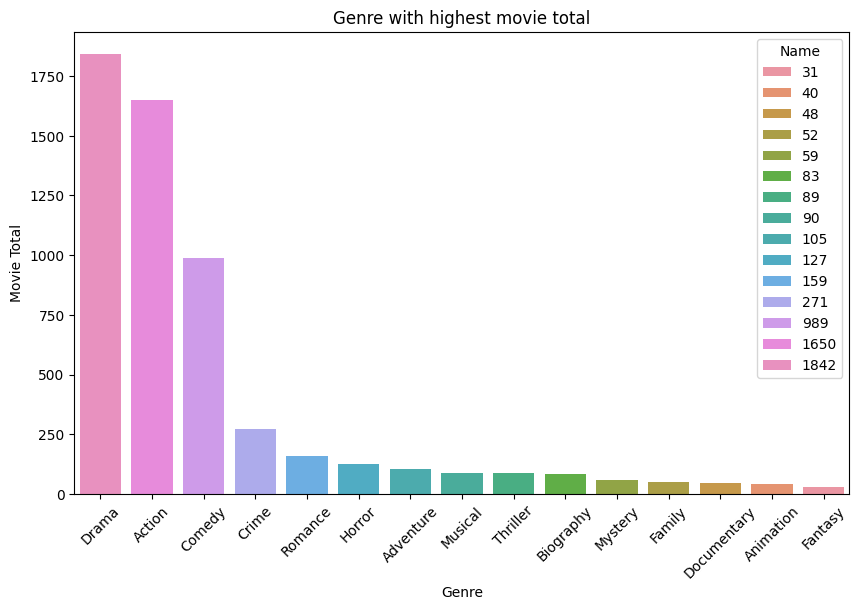

In [18]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
fig = sns.barplot(movie_by_genre[movie_by_genre['Name'] > 30], x='Genre',y='Name' , hue='Name', dodge=False)
plt.ylabel('Movie Total')
fig.set(title='Genre with highest movie total')

[Text(0.5, 1.0, 'Genre with highest rating')]

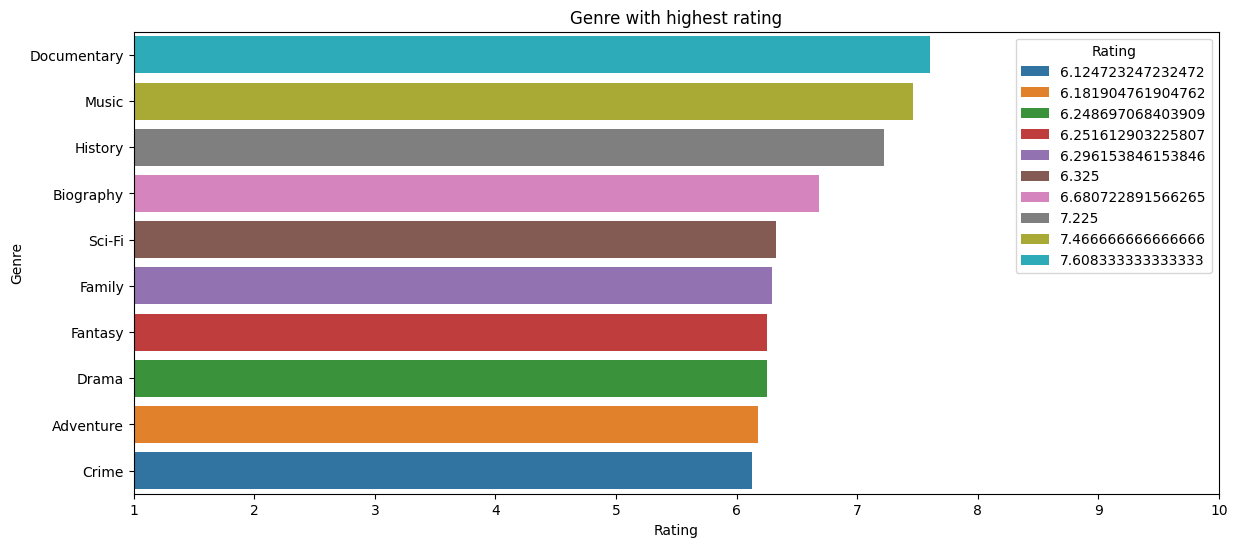

In [19]:
# top ten movie genre with highest rating average
plt.figure(figsize=(14,6))
plt.xlim(1,10)
rating_by_genre  = dataset[['Genre','Rating']].groupby(by='Genre',as_index=False).mean().sort_values(by='Rating',ascending=False)
fig = sns.barplot(rating_by_genre[:10], x='Rating',y='Genre',hue='Rating',dodge=False, orient='h')
fig.set(title='Genre with highest rating')


In [20]:
rating_by_genre
# most of the genre with high rating have a count of 1 movie

,Genre,Rating
6,Documentary,7.608333
12,Music,7.466667
10,History,7.225000
3,Biography,6.680723
16,Sci-Fi,6.325000
8,Family,6.296154
9,Fantasy,6.251613
7,Drama,6.248697
1,Adventure,6.181905
5,Crime,6.124723


In [21]:
movie_by_genre = movie_by_genre.drop(['Rating'], axis=1)
rating_count = pd.concat([movie_by_genre, rating_by_genre], axis=1)
top_genre = rating_count
top_genre.shape

(20, 11)

In [22]:
# rmeove the duplicate column genre
top_genre = top_genre.iloc[:,[1,2,3,4,5,6,7,8,9,10]]

[Text(0.5, 1.0, 'Genre  vs rating')]

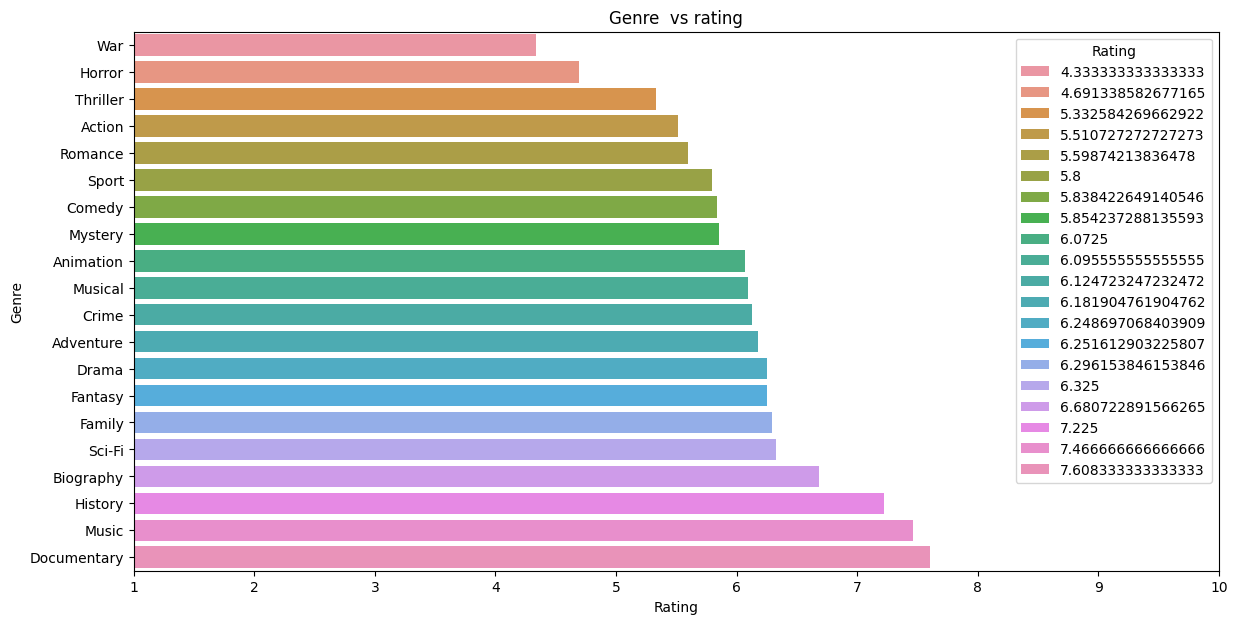

In [23]:
plt.figure(figsize=(14,7))
plt.xlim(1,10)
fig = sns.barplot(top_genre.sort_values(by='Rating'), x='Rating',hue='Rating',y='Genre',dodge=False, orient='h')
fig.set(title='Genre  vs rating')

In [24]:
# movie with the highest rating
print(dataset['Rating'].max())

10.0


In [25]:
dataset[dataset['Rating'] == 10.0]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3146,Love Qubool Hai,2020,94,Drama,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [26]:
# Top 10 movies according to rating per year and overall.
dataset.sort_values(by='Rating', ascending=False)[:10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3146,Love Qubool Hai,2020,94,Drama,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
2027,Half Songs,2021,79,Music,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
1897,Gho Gho Rani,2019,105,History,9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
2574,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5165,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
4609,Secrets of Sinauli,2021,56,Documentary,9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
3149,Love Sorries,2021,101,Comedy,9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
692,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
1919,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
4321,Reflct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


In [27]:
# bottom 10 movies
dataset.sort_values(by='Rating', ascending=False)[-10:]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4200,Radhe,2021,135,Action,1.8,162455,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda
1099,Chatur Singh Two Star,2011,150,Action,1.7,624,Ajay Chandhok,Sanjay Dutt,Ameesha Patel,Anupam Kher
4264,Ram Gopal Varma Ki Aag,2007,171,Action,1.7,6655,Ram Gopal Varma,Amitabh Bachchan,Mohanlal,Ajay Devgn
2235,Humein Tumse Pyar Ho Gaya Chupke Chupke,2003,135,Drama,1.7,27,Pramod Mandloi,Meghna Desai,Siddharth Dhawan,Dinesh Hingoo
4065,Prem Aggan,1998,168,Drama,1.7,544,Feroz Khan,Fardeen Khan,Meghna Kothari,Sameer Malhotra
2148,Himmatwala,2013,150,Action,1.7,8186,Sajid Khan,Ajay Devgn,Tamannaah Bhatia,Mahesh Manjrekar
3575,Mumbai Can Dance Saalaa,2015,135,Drama,1.6,43,Sachindra Sharma,Shakti Kapoor,Prashant Narayanan,Aditya Pancholi
5481,Welcome to New York,2018,118,Comedy,1.6,774,Chakri Toleti,Richard Harris,Jasmine Kaur,Sonakshi Sinha
1357,Desh Drohi,2008,140,Action,1.4,3899,Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt
4456,Sadak,2020,133,Action,1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [28]:
# number of votes / movie with the highest votes/ votes per rating
dataset['Votes'] = dataset['Votes'].astype('int')

In [29]:
print(dataset['Votes'].idxmax())
print(dataset.loc[dataset['Votes'].idxmax()])


3088
Name          Life of Pi
Year                2012
Duration            127 
Genre          Adventure
Rating               7.9
Votes             591417
Director         Ang Lee
Actor 1     Suraj Sharma
Actor 2      Irrfan Khan
Actor 3     Adil Hussain
Name: 3088, dtype: object


In [30]:
def add_decade(df):
  return (int(df)//10) * 10
rating_yr = dataset[['Year','Rating']].groupby(by='Year',as_index = False).mean()
count_yr = dataset[['Year','Rating','Name']].groupby(by='Year', as_index=False).count()
rating_yr['Decade'] = rating_yr['Year'].apply(add_decade)
rating_yr[rating_yr['Decade'] == 1930]

,Year,Rating,Decade
0,1931,5.750000,1930
1,1932,6.000000,1930
2,1933,6.200000,1930
3,1934,5.600000,1930
4,1935,5.700000,1930
5,1936,5.885714,1930
6,1937,6.033333,1930
7,1938,6.120000,1930
8,1939,6.500000,1930


[Text(0.5, 1.0, 'Rating vs Years ')]

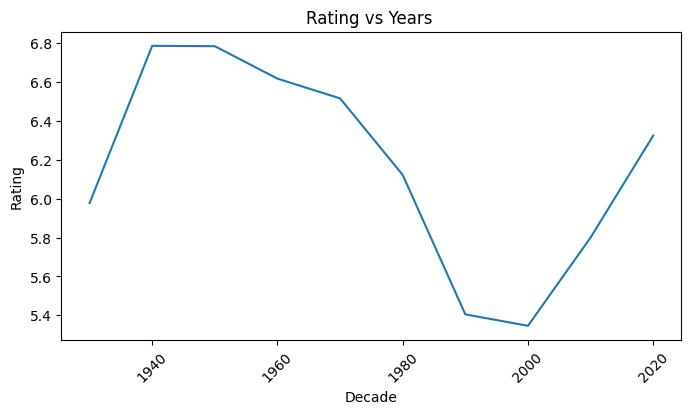

In [31]:
# rating per year and overall.
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
fig = sns.lineplot(rating_yr[['Decade','Rating']].groupby(by='Decade',as_index=False).mean(), x='Decade',y='Rating')
fig.set(title='Rating vs Years ')

In [32]:
count_yr['Decade'] = count_yr['Year'].apply(add_decade)

In [33]:
count_yr

,Year,Rating,Name,Decade
0,1931,2,2,1930
1,1932,1,1,1930
2,1933,1,1,1930
3,1934,2,2,1930
4,1935,5,5,1930
...,...,...,...,...
86,2017,211,211,2010
87,2018,201,201,2010
88,2019,227,227,2010
89,2020,140,140,2020


[Text(0.5, 1.0, 'movie count vs Decade ')]

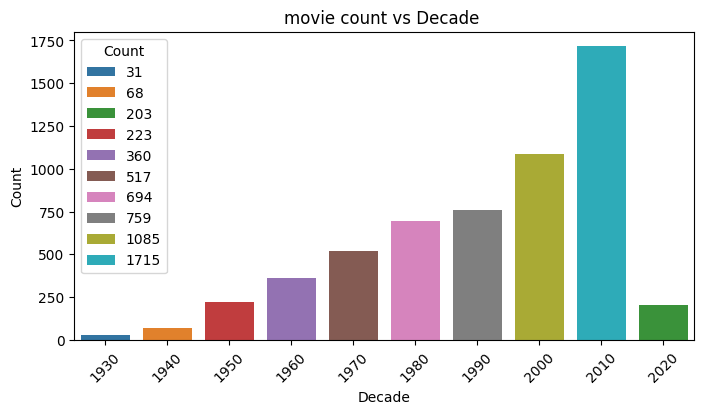

In [34]:
count_yr[['Decade','Name']].groupby(by='Decade',as_index=False).sum()
count_yr.rename({'Name':'Count'}, inplace=True,axis=1)
# rating per year and overall.
plt.figure(figsize=(8,4))
plt.xticks(rotation=45)
fig = sns.barplot(count_yr[['Decade','Rating','Count']].groupby(by='Decade',
            as_index=False).sum(), x='Decade',y='Count',hue='Count', dodge=False)
fig.set(title='movie count vs Decade ')

<Figure size 800x400 with 0 Axes>

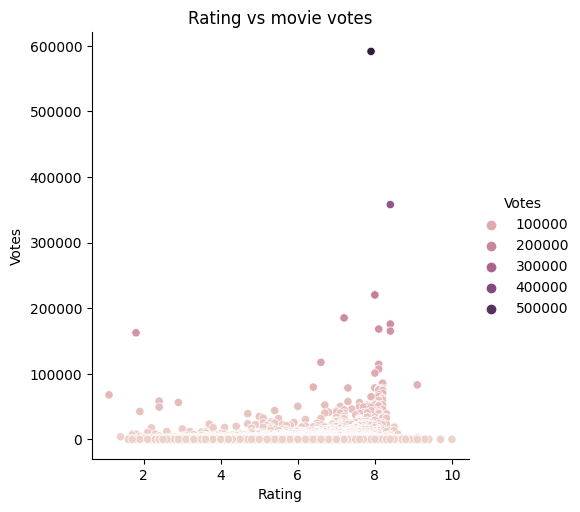

In [35]:
# how number of votes and rating of movie relate
plt.figure(figsize=(8,4))
fig = sns.relplot(dataset.sort_values(by='Votes',ascending=False), x='Rating',y='Votes',hue='Votes')
fig.set(title='Rating vs movie votes')

In [36]:
# Highest rated  movie released each year.
dataset[['Year','Rating']].groupby('Year',as_index=False).max().sort_values(by='Rating', ascending=False)[:20]

,Year,Rating
89,2020,10.0
90,2021,9.7
88,2019,9.4
87,2018,9.3
76,2007,9.2
84,2015,9.2
80,2011,9.1
86,2017,9.0
77,2008,8.9
85,2016,8.8


In [37]:
top_10 = dataset.groupby('Year',as_index=False).count().sort_values(by='Name',ascending=False)[:10]
top_10

,Year,Name,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
88,2019,227,227,227,227,227,227,227,227,227
86,2017,211,211,211,211,211,211,211,211,211
87,2018,201,201,201,201,201,201,201,201,201
84,2015,176,176,176,176,176,176,176,176,176
85,2016,173,173,173,173,173,173,173,173,173
82,2013,167,167,167,167,167,167,167,167,167
83,2014,164,164,164,164,164,164,164,164,164
74,2005,141,141,141,141,141,141,141,141,141
89,2020,140,140,140,140,140,140,140,140,140
81,2012,140,140,140,140,140,140,140,140,140


[Text(0.5, 1.0, 'Top 10 years by movie releases')]

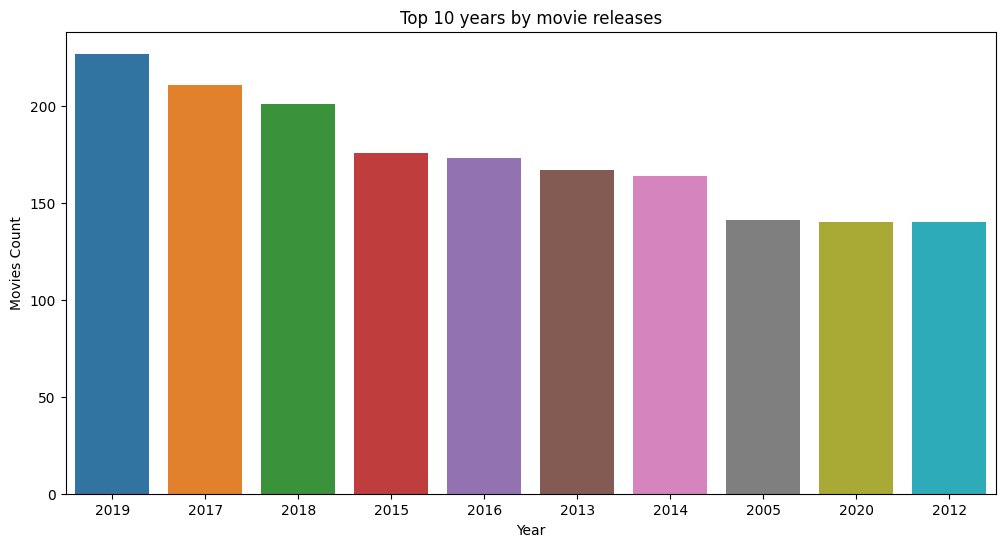

In [38]:
plt.figure(figsize=(12,6))
fig = sns.barplot(top_10,x='Year',y='Name')
plt.ylabel('Movies Count')
fig.set(title="Top 10 years by movie releases")


In [39]:
dataset[dataset['Year'] == '1931']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1567,Draupadi,1931,124,Drama,5.3,6,Bhagwati Prasad Mishra,Khalil,Ermeline,Jillo
5144,The Light of the World,1931,124,Drama,6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo


[Text(0.5, 1.0, 'Years with highest movie rating')]

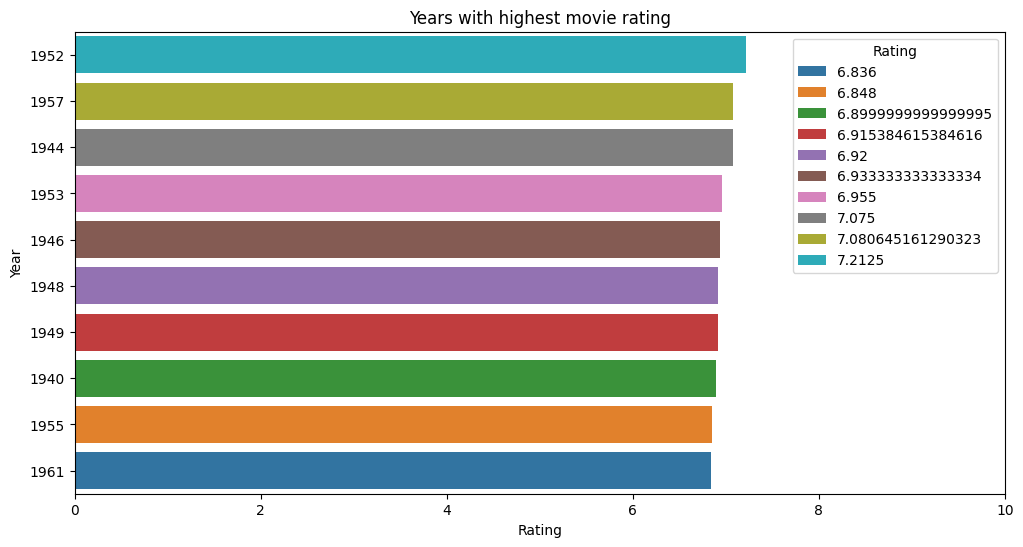

In [40]:
# top 10 year with the highest rating average
movie_by_year_rating = dataset[['Year','Rating',]].groupby('Year', as_index=False).mean().sort_values(by='Rating',ascending=False)

plt.figure(figsize=(12,6))
plt.xlim(0,10)
fig = sns.barplot(movie_by_year_rating[:10], x='Rating', y='Year',hue='Rating',dodge=False )
fig.set(title='Years with highest movie rating')

Text(0.5, 0, 'Movie Count')

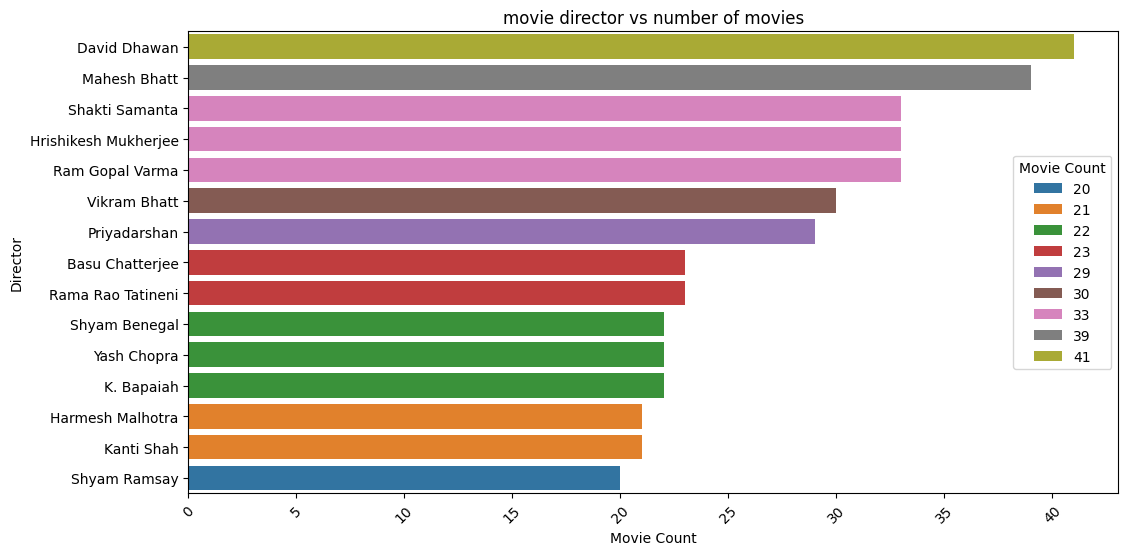

In [41]:
# Which directors have the most movies
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
directors_count = dataset.groupby(by='Director', as_index=False).count().sort_values(by='Name',ascending=False)
directors_count.rename({'Name':'Movie Count'}, inplace=True, axis=1)
fig = sns.barplot(directors_count[:15], x='Movie Count', y='Director', orient='h', hue='Movie Count',dodge=False)
fig.set(title='movie director vs number of movies')
plt.xlabel('Movie Count')

In [42]:
directors_rating = dataset[['Director','Rating']].groupby(by='Director', as_index=False).mean().sort_values(by='Rating', ascending=False)

print(directors_rating.shape)
print(directors_count.shape)

directors_rating.rename({'Director':'Director','Rating':'Average Rating'},inplace=True,axis=1)


(2430, 2)
(2430, 10)


In [43]:
directors_rating.head()

,Director,Average Rating
1832,Saif Ali Sayeed,10.0
2106,Sriram Raja,9.7
1239,Munni Pankaj,9.4
2141,Suhrud Godbole,9.4
274,Arvind Pratap,9.4


In [44]:
directors_count.head()

,Director,Movie Count,Year,Duration,Genre,Rating,Votes,Actor 1,Actor 2,Actor 3
479,David Dhawan,41,41,41,41,41,41,41,41,41
1089,Mahesh Bhatt,39,39,39,39,39,39,39,39,39
1974,Shakti Samanta,33,33,33,33,33,33,33,33,33
730,Hrishikesh Mukherjee,33,33,33,33,33,33,33,33,33
1641,Ram Gopal Varma,33,33,33,33,33,33,33,33,33


In [45]:
director_rating_movie_count = pd.concat([directors_count[['Director','Movie Count']],directors_rating],axis=1)

In [46]:
director_rating_movie_count

,Director,Movie Count,Director,Average Rating
479,David Dhawan,41,David Dhawan,5.226829
1089,Mahesh Bhatt,39,Mahesh Bhatt,5.753846
1974,Shakti Samanta,33,Shakti Samanta,6.606061
730,Hrishikesh Mukherjee,33,Hrishikesh Mukherjee,7.266667
1641,Ram Gopal Varma,33,Ram Gopal Varma,5.596970
...,...,...,...,...
974,Kesar Matharu,1,Kesar Matharu,3.600000
972,Kedar Shinde,1,Kedar Shinde,5.100000
969,Kaustav Narayan Niyogi,1,Kaustav Narayan Niyogi,3.400000
968,Kaushik Roy,1,Kaushik Roy,6.200000


In [47]:
director_rating_movie_count = director_rating_movie_count.iloc[:,1:]
director_rating_movie_count.shape

(2430, 3)

In [48]:
# movie directors with more than 7 average rating and more than 10 films produced
director_rating_movie_count[(director_rating_movie_count['Movie Count'] > 10) & (director_rating_movie_count['Movie Count'] > 7) ]

,Movie Count,Director,Average Rating
479,41,David Dhawan,5.226829
1089,39,Mahesh Bhatt,5.753846
1974,33,Shakti Samanta,6.606061
730,33,Hrishikesh Mukherjee,7.266667
1641,33,Ram Gopal Varma,5.596970
...,...,...,...
2321,11,Vijay Anand,7.281818
1889,11,Sanjay Gupta,5.590909
319,11,Atma Ram,5.763636
417,11,Brij,6.827273


[Text(0.5, 1.0, 'Movie directors with more than 20 films and their  rating')]

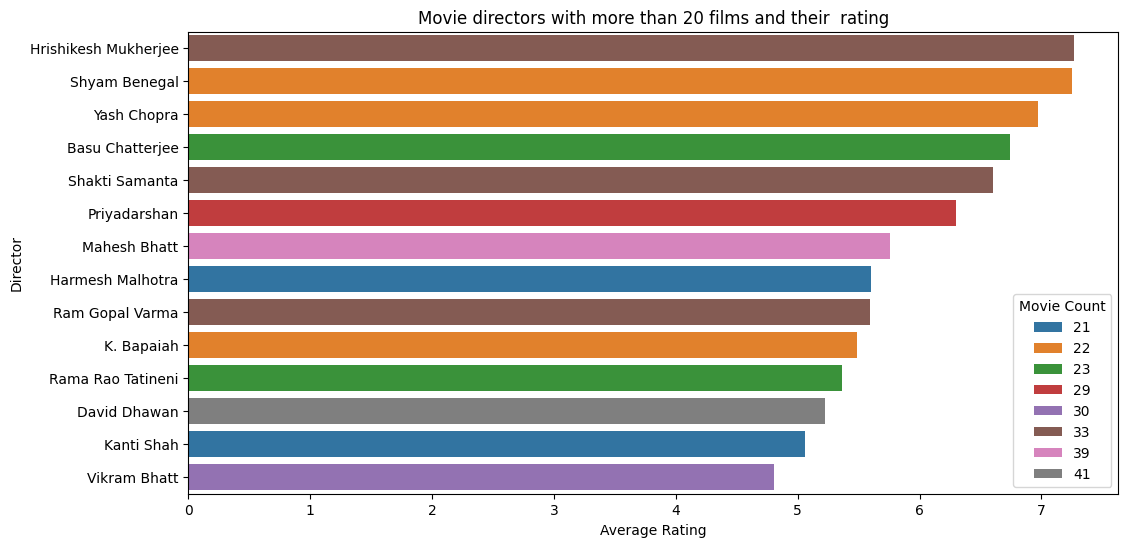

In [49]:
plt.figure(figsize=(12,6))
fig = sns.barplot(director_rating_movie_count[director_rating_movie_count['Movie Count'] > 20].sort_values(by='Average Rating',ascending=False),
                  x='Average Rating', y='Director', hue='Movie Count', dodge=False)
fig.set(title='Movie directors with more than 20 films and their  rating')

<Figure size 1200x600 with 0 Axes>

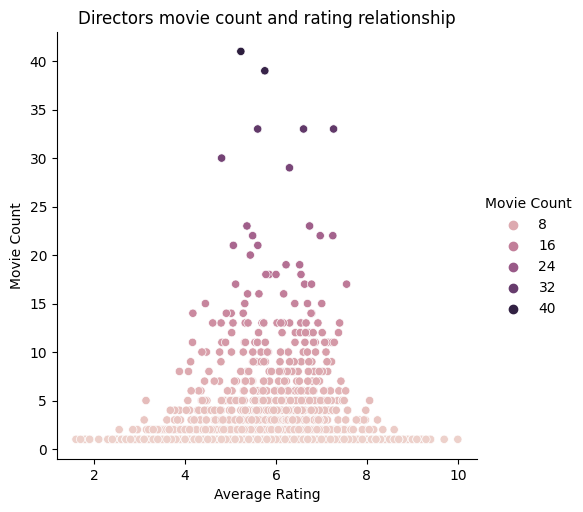

In [50]:
plt.figure(figsize=(12,6))
fig = sns.relplot(director_rating_movie_count,x='Average Rating', y='Movie Count', hue='Movie Count')
fig.set(title='Directors movie count and rating relationship')

In [51]:
# Which actor starring in most movie
actor_1_most_movies = dataset.groupby(by='Actor 1').count().sort_values(by='Duration', ascending=False)[:10]
actor_1_most_movies.rename({'Name':'Count'}, inplace=True,axis=1)
actor_1_most_movies

,Count,Year,Duration,Genre,Rating,Votes,Director,Actor 2,Actor 3
Actor 1,,,,,,,,,
Amitabh Bachchan,104,104,104,104,104,104,104,104,104
Mithun Chakraborty,93,93,93,93,93,93,93,93,93
Ashok Kumar,91,91,91,91,91,91,91,91,91
Dharmendra,90,90,90,90,90,90,90,90,90
Jeetendra,89,89,89,89,89,89,89,89,89
Akshay Kumar,82,82,82,82,82,82,82,82,82
Shashi Kapoor,81,81,81,81,81,81,81,81,81
Rajesh Khanna,74,74,74,74,74,74,74,74,74
Ajay Devgn,70,70,70,70,70,70,70,70,70


Text(0.5, 0, 'Movies Starring')

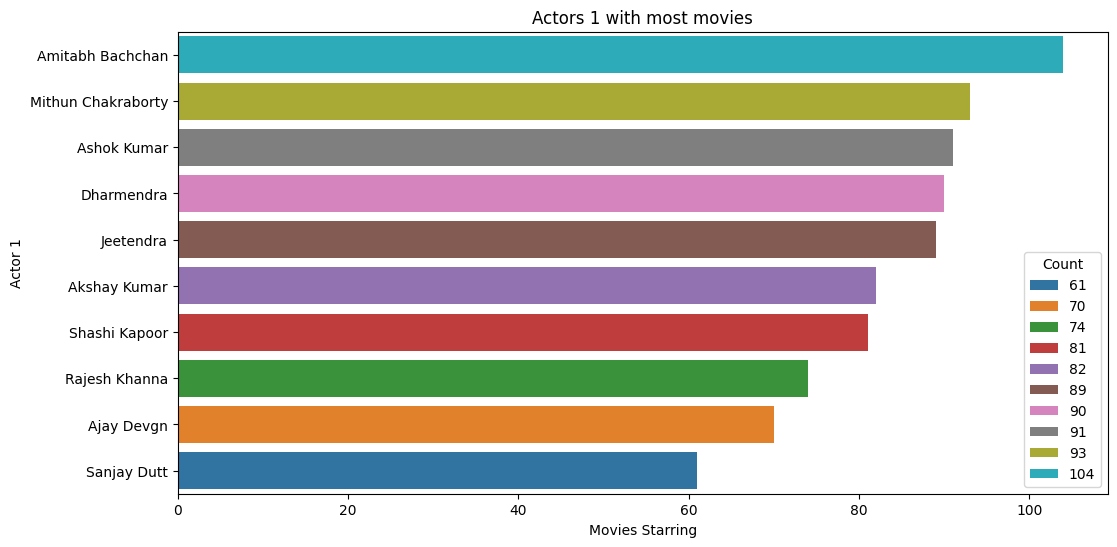

In [52]:
plt.figure(figsize=(12,6))
fig = sns.barplot(actor_1_most_movies, x='Count', y=actor_1_most_movies.index,hue='Count', dodge=False)
fig.set(title='Actors 1 with most movies')
plt.xlabel('Movies Starring')

In [53]:
# actors with the most votes and highest rating average
actor_1_rating = dataset.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False)[:20]
actor_1_rating[actor_1_rating['Rating'] > 7.0]


<ipython-input-53-0a1e20a06aa9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actor_1_rating = dataset.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False)[:20]


,Rating,Votes
Actor 1,,
Suraj Sharma,7.9,591417.0
Ben Kingsley,8.0,220118.0
Amole Gupte,8.4,175810.0
Dev Patel,7.8,138287.0
Suriya,9.1,83029.0
Helen Mirren,7.3,78340.0
Adarsh Gourav,7.1,49877.0
Rajat Barmecha,8.1,43199.0
Priyamvada Narayanan,7.2,40234.0


In [54]:
print(dataset.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False).shape)
print(dataset.groupby(by='Actor 1').count().sort_values(by='Duration', ascending=False).shape)
dt1 = dataset.groupby(by='Actor 1').mean()
dt2 = dataset.groupby(by='Actor 1').count()
combined_actor1_dt = pd.concat([dt1,dt2['Name']],axis=1)
combined_actor1_dt.rename({'Name':'Movie count'}, inplace=True,axis=1)
combined_actor1_dt.tail()

(1960, 2)
(1960, 9)


<ipython-input-54-7326fd629f4e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(dataset.groupby(by='Actor 1').mean().sort_values(by='Votes', ascending=False).shape)
<ipython-input-54-7326fd629f4e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt1 = dataset.groupby(by='Actor 1').mean()


,Rating,Votes,Movie count
Actor 1,,,
Zarina Wahab,2.600000,7.00,1
Zayed Khan,4.575000,514.75,4
Zeenat Aman,6.045455,152.00,11
Zenia Starr,7.400000,24.00,1
Zulfi Sayed,5.200000,136.50,2


In [55]:
combined_actor1_dt[(combined_actor1_dt['Movie count'] > 10 ) & (combined_actor1_dt['Rating'] > 6)].sort_values(by='Rating',ascending=False).head()

,Rating,Votes,Movie count
Actor 1,,,
Nargis,7.454545,664.227273,22
Irrfan Khan,7.152941,14037.823529,17
Balraj Sahni,7.130769,289.307692,13
Amol Palekar,7.061538,1705.615385,13
Dilip Kumar,7.043333,467.066667,30


<Figure size 1200x600 with 0 Axes>

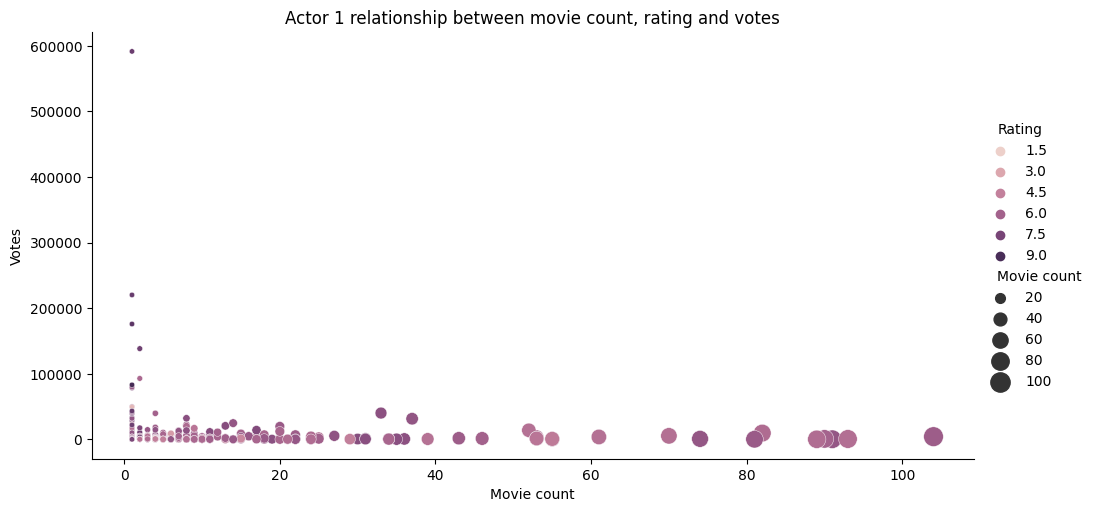

In [56]:
plt.figure(figsize=(12,6))
fig = sns.relplot(combined_actor1_dt, x='Movie count', y='Votes', hue='Rating',size='Movie count',sizes = (15,200),aspect=2)
# fig = sns.relplot(combined_actor1_dt, x='Movie count', y='Votes', kind='line')

fig.set(title='Actor 1 relationship between movie count, rating and votes')

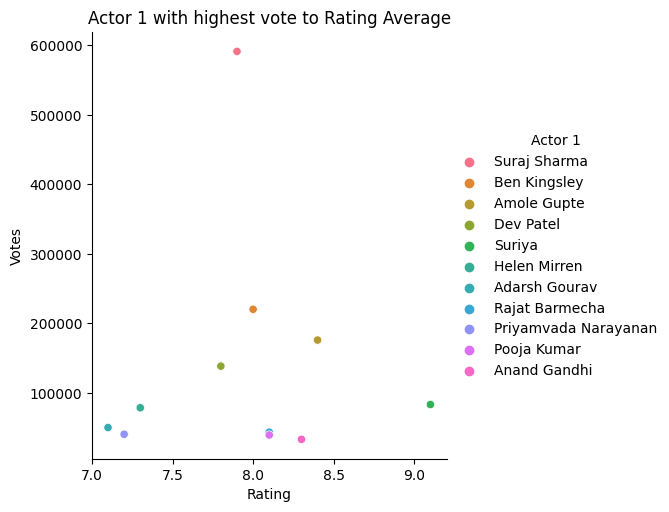

In [57]:
fig = sns.relplot(actor_1_rating[actor_1_rating['Rating'] > 7.0], x='Rating', y='Votes',hue=actor_1_rating[actor_1_rating['Rating'] > 7.0].index)
fig.set(title='Actor 1 with highest vote to Rating Average')

<ipython-input-58-5504a714b253>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actor_1 = dataset.groupby(by='Actor 1').sum().sort_values(by='Duration', ascending=False)


[Text(0.5, 1.0, 'Actor 1 with highest Duration in minutes')]

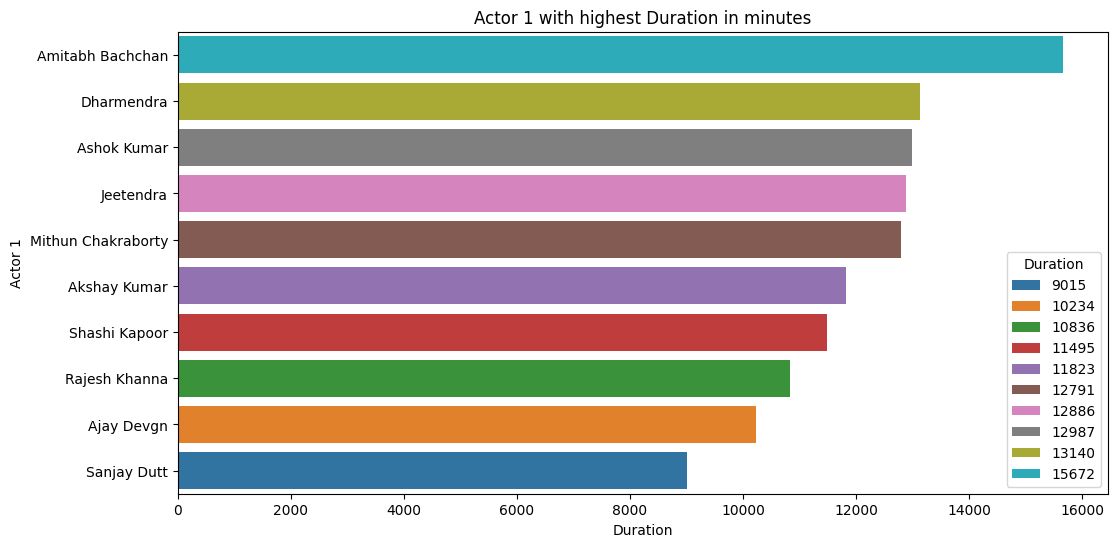

In [58]:
dataset['Duration'] = dataset['Duration'].astype('int')
plt.figure(figsize=(12,6))
actor_1 = dataset.groupby(by='Actor 1').sum().sort_values(by='Duration', ascending=False)
fig = sns.barplot(actor_1[:10], x='Duration', y=actor_1[:10].index, hue='Duration', dodge=False )
fig.set(title='Actor 1 with highest Duration in minutes')

In [59]:
dataset.groupby('Actor 1').sum()

<ipython-input-59-41c0d9c9c23a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('Actor 1').sum()


,Duration,Rating,Votes
Actor 1,,,
A. Muthu,137,3.3,96
A. Nairang,140,6.1,22
A.K. Hangal,108,6.2,111
A.S. Ravindra Babu,150,4.8,1238
Aachi Manorama,165,4.8,12
...,...,...,...
Zarina Wahab,135,2.6,7
Zayed Khan,532,18.3,2059
Zeenat Aman,1533,66.5,1672


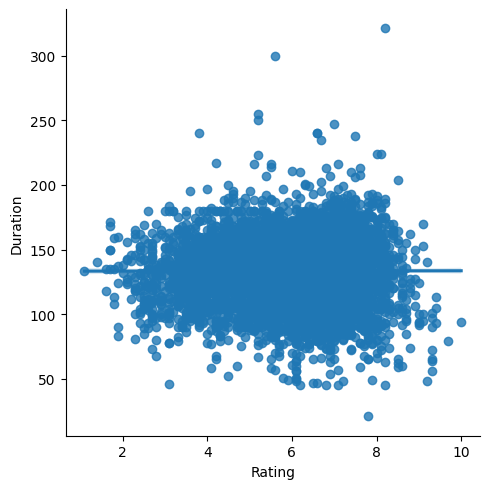

In [60]:
sns.lmplot(dataset,x='Rating',y='Duration')

In [61]:
actor_1

,Duration,Rating,Votes
Actor 1,,,
Amitabh Bachchan,15672,643.1,425222
Dharmendra,13140,533.4,57096
Ashok Kumar,12987,595.2,17187
Jeetendra,12886,481.4,9708
Mithun Chakraborty,12791,496.3,50234
...,...,...,...
Sudesh Berry,46,3.1,15
Nazneen Bhatia,45,6.2,186
Sadiya Azgar,45,6.8,101


# Feature Engineering

In [94]:
# there are several factors that affect the rating of a movie directly
# the director, the actors, the genre
# it would be best if you had a column of the average rating of those columns

director_average_rating = dataset[['Director','Rating']].groupby('Director').transform('mean')
actor_1_average_rating = dataset[['Rating','Actor 1']].groupby('Actor 1').transform('mean')
actor_2_average_rating  = dataset[['Rating','Actor 2']].groupby('Actor 2').transform('mean')
actor_3_average_rating = dataset[['Rating','Actor 3']].groupby('Actor 3').transform('mean')
genre_average_rating = dataset[['Rating','Genre']].groupby('Genre').transform('mean')

In [95]:
# rename the columns
director_average_rating.rename(columns={'Rating':'Director Rating'},inplace=True)
actor_1_average_rating.rename(columns={'Rating':'Actor 1 Rating'}, inplace=True)
actor_2_average_rating.rename(columns={'Rating':'Actor 2 Rating'}, inplace=True)
actor_3_average_rating.rename(columns={'Rating':'Actor 3 Rating'}, inplace=True)
genre_average_rating.rename(columns={'Rating':'Genre Rating'}, inplace=True)


In [96]:
print(director_average_rating.shape)
print(actor_2_average_rating.shape)
print(actor_1_average_rating.shape)
print(actor_3_average_rating.shape)
print(genre_average_rating.shape)

(5655, 1)
(5655, 1)
(5655, 1)
(5655, 1)
(5655, 1)


In [97]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,2001,153,Biography,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [102]:
new = pd.concat([dataset,director_average_rating,actor_2_average_rating,actor_1_average_rating,actor_3_average_rating,genre_average_rating],axis=1)

In [117]:
new.duplicated().any()

False

# Model Training

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = new[['Year','Votes','Duration','Director Rating','Actor 1 Rating','Actor 2 Rating','Actor 3 Rating','Genre Rating']]
y = new['Rating']
# split your dataset to training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)



LinearRegression Algorithm

In [152]:
Regressor = LinearRegression()
Regressor.fit(X_train,y_train)
y_pred = Regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.7675424586855203


RandomForestRegressor Algorithm

In [144]:
Regressor = RandomForestRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(r2_score(y_test, y_pred))

0.8178683307353388


DecisionTreeRegressor Algorithm

In [145]:
Regressor = DecisionTreeRegressor(criterion='poisson' ,max_depth=6)
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(r2_score(y_test, y_pred))

0.7394078837962692
